# Telecom users dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

pd.options.display.max_columns=None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
users = pd.read_csv('telecom_users.csv')
users.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No


### COLUMNS EXPLANATION

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has is the telephone service connectedbeen a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

In [3]:
users.drop('Unnamed: 0', 1, inplace = True)

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [5]:
users.TotalCharges.replace(' ', 0, inplace=True)
users.TotalCharges = pd.to_numeric(users.TotalCharges)

In [6]:
users.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
users.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [112]:
def stacked_bar_plot(column, hue, ax, axnumber):
    df_plot = users.groupby([hue, column]).size().reset_index().pivot(columns=hue, index=column, values=0)
    df_plot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)


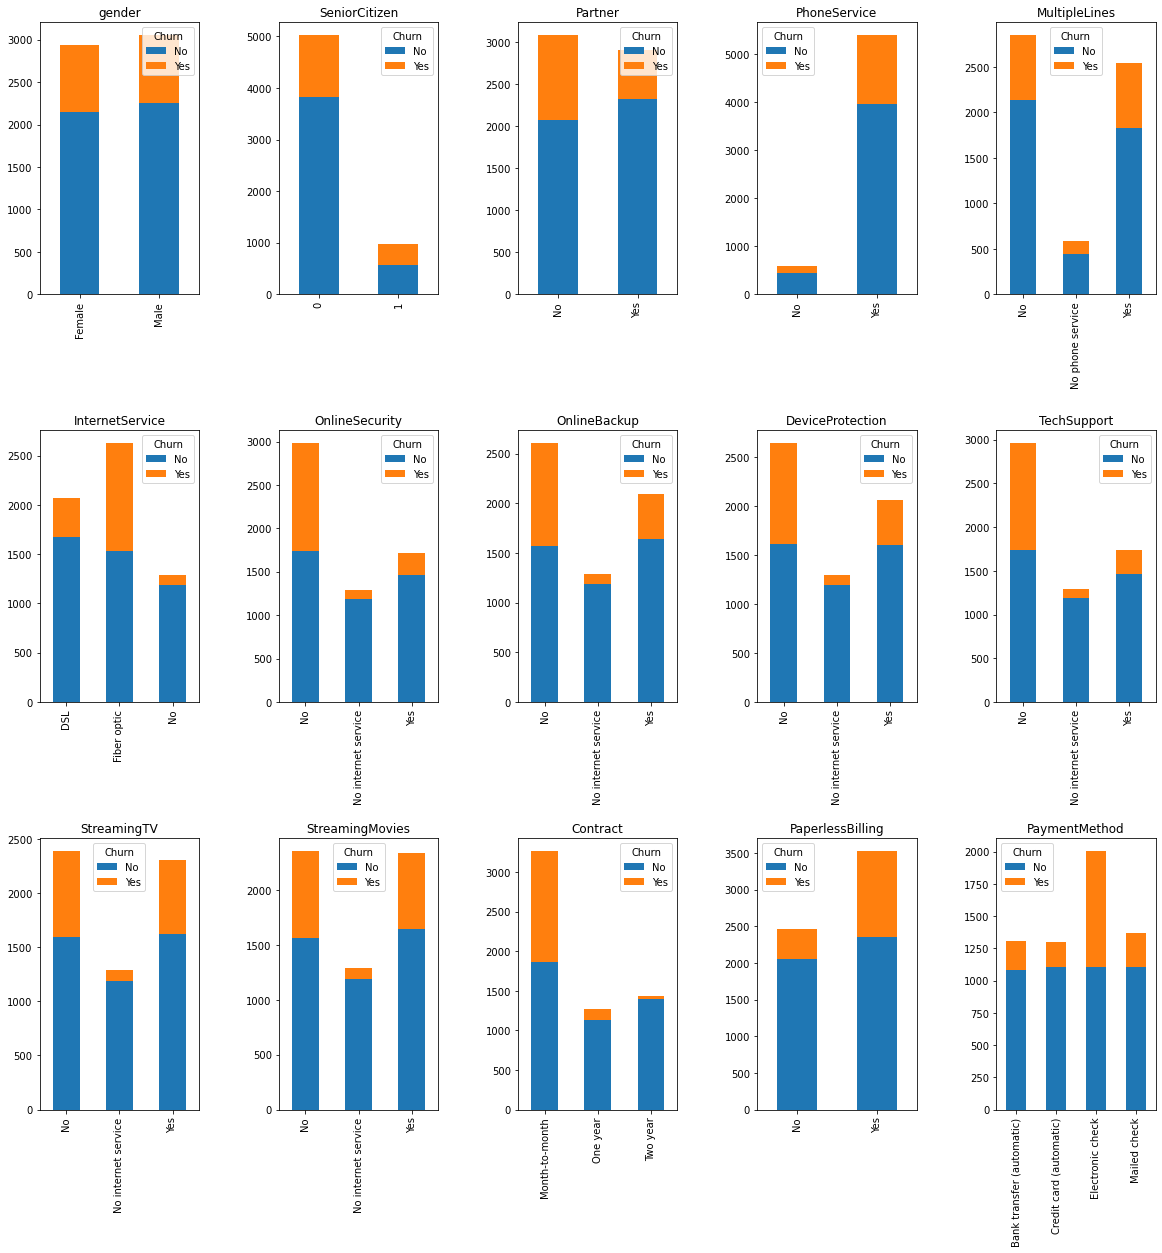

In [113]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5, figsize = (20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

stacked_bar_plot('gender', 'Churn', ax1, 1)
stacked_bar_plot('SeniorCitizen', 'Churn', ax2, 2)
stacked_bar_plot('Partner', 'Churn', ax3, 3)
stacked_bar_plot('PhoneService', 'Churn', ax4, 4)
stacked_bar_plot('MultipleLines', 'Churn', ax5, 5)
stacked_bar_plot('InternetService', 'Churn', ax6, 6)
stacked_bar_plot('OnlineSecurity', 'Churn', ax7, 7)
stacked_bar_plot('OnlineBackup', 'Churn', ax8, 8)
stacked_bar_plot('DeviceProtection', 'Churn', ax9, 9)
stacked_bar_plot('TechSupport', 'Churn', ax10, 10)
stacked_bar_plot('StreamingTV', 'Churn', ax11, 11)
stacked_bar_plot('StreamingMovies', 'Churn', ax12, 12)
stacked_bar_plot('Contract', 'Churn', ax13, 13)
stacked_bar_plot('PaperlessBilling', 'Churn', ax14, 14)
stacked_bar_plot('PaymentMethod', 'Churn', ax15, 15)



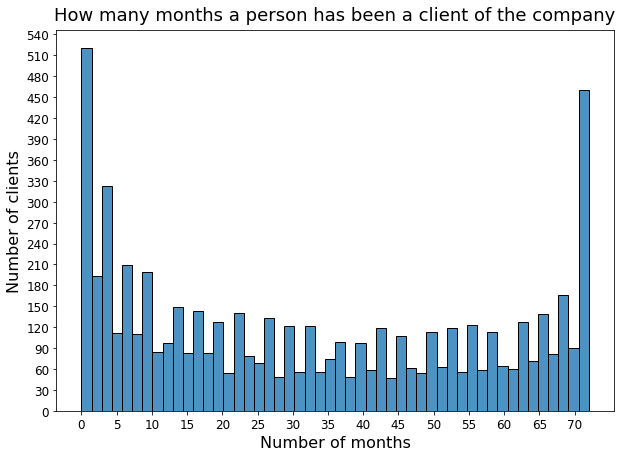

In [71]:
tenure = users['tenure']

plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)

plt.title('How many months a person has been a client of the company', fontsize=18, pad=10)
plt.xticks(list(range(0, tenure.max(), 5)), fontsize=12)
plt.yticks(list(range(0, 550, 30)), fontsize=12)
plt.xlabel('Number of months', fontsize=16)
plt.ylabel('Number of clients', fontsize=16)
plt.show()

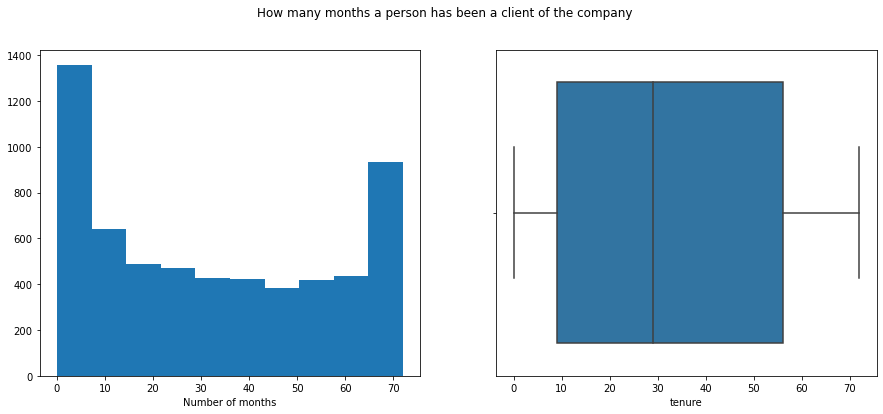

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.tenure)
ax1.set_xlabel('Number of months')

sns.boxplot(users.tenure)

fig.suptitle('How many months a person has been a client of the company')

plt.show();

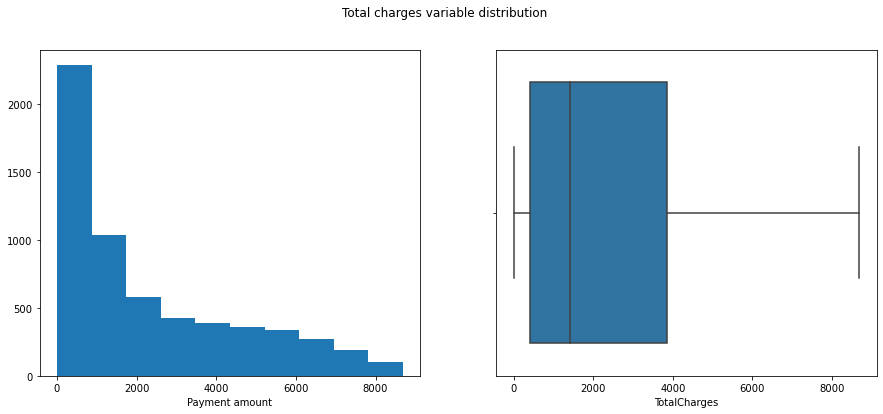

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.TotalCharges)
ax1.set_xlabel('Payment amount')

sns.boxplot(users.TotalCharges)

fig.suptitle('Total charges variable distribution')

plt.show();


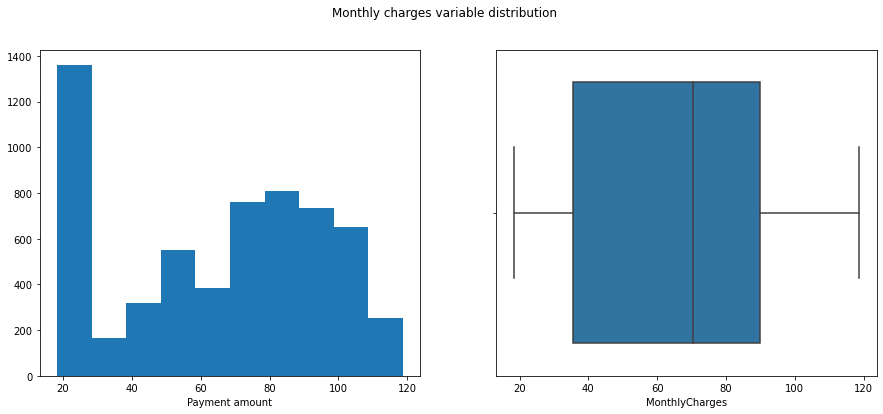

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.MonthlyCharges)
sns.boxplot(users.MonthlyCharges)

ax1.set_xlabel('Payment amount')

fig.suptitle('Monthly charges variable distribution')

plt.show();

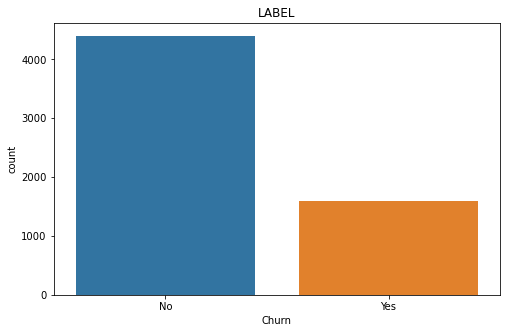

In [11]:
fig,ax = plt.subplots(figsize = (8,5))
sns.countplot(users.Churn)
plt.title('LABEL')
plt.show();

## ONE HOT ENCODING

In [12]:
users.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
users = pd.get_dummies(users, columns=[ 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [14]:
users.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7010-BRBUU,0,72,24.10,1734.65,No,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,9688-YGXVR,0,44,88.15,3973.20,No,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0


<AxesSubplot:>

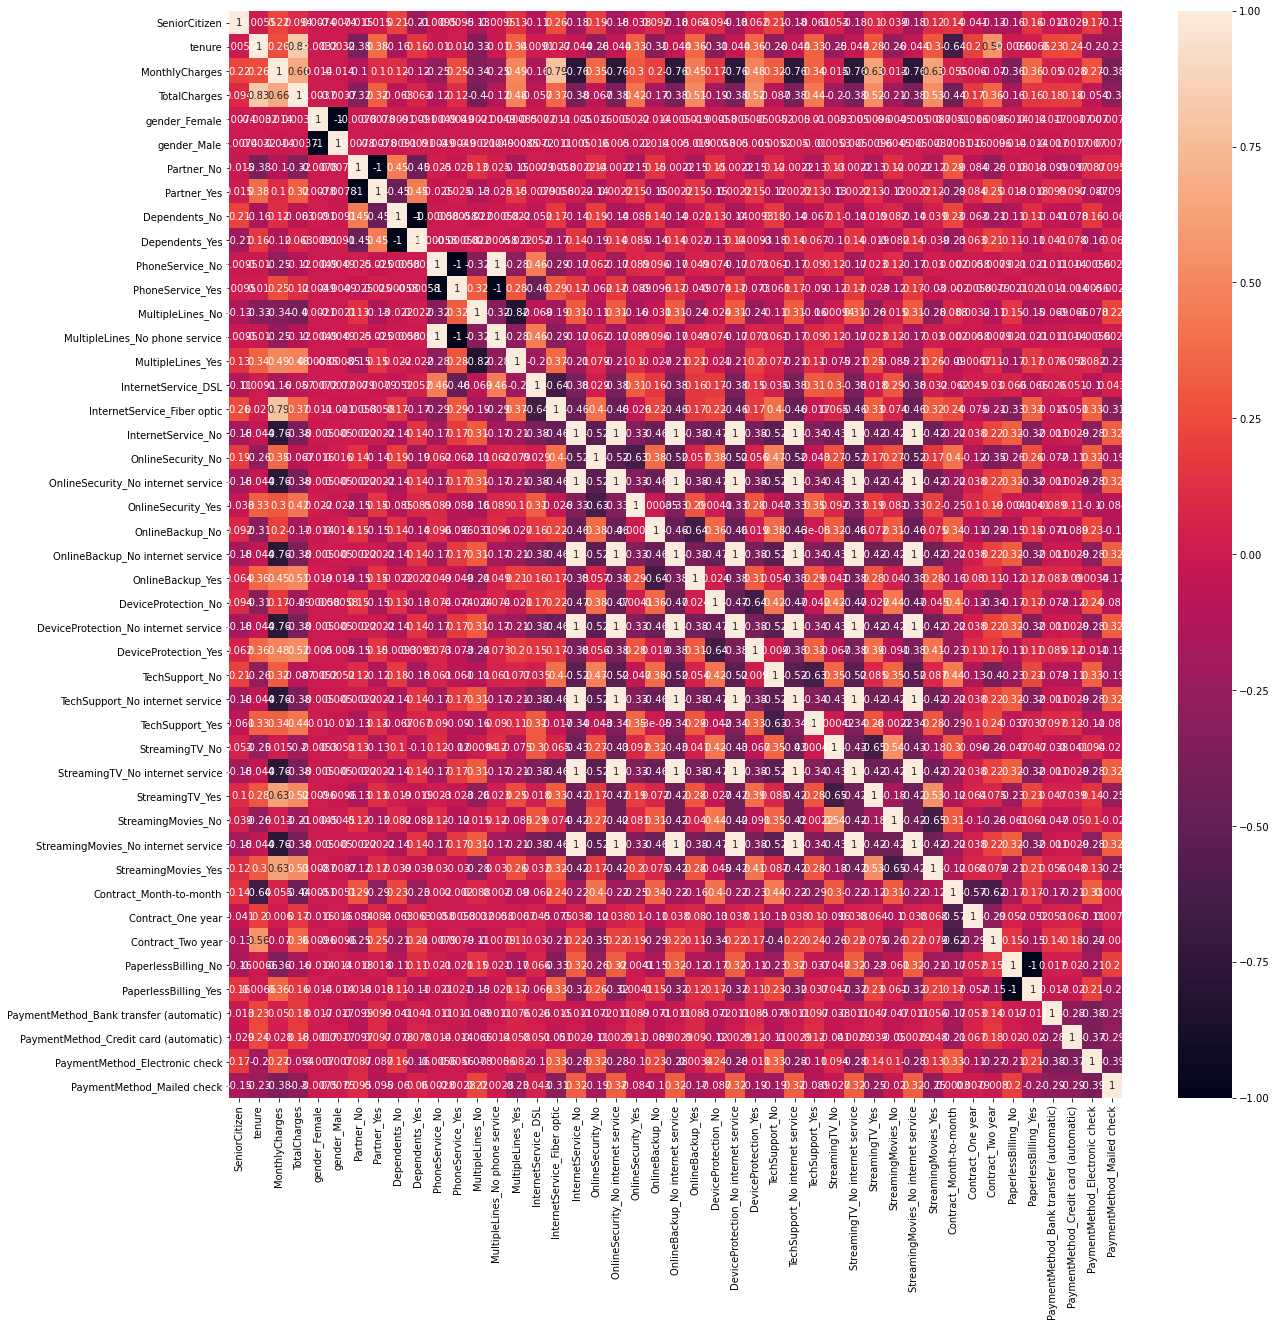

In [15]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(users.corr(), annot=True)

In [82]:
corr = users.corr()

Churn = pd.DataFrame(corr['Churn'].sort_values(ascending=False))
Churn

,Churn
Churn,1.000000
Contract_Month-to-month,0.403907
OnlineSecurity_No,0.341700
TechSupport_No,0.330994
InternetService_Fiber optic,0.300898
PaymentMethod_Electronic check,0.296803
OnlineBackup_No,0.265175
DeviceProtection_No,0.252376
PaperlessBilling_Yes,0.188996
MonthlyCharges,0.186753


## MACHINE LEARNING

In [22]:
users.Churn = LabelEncoder().fit_transform(users.Churn)

In [28]:
users.head(1)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7010-BRBUU,0,72,24.1,1734.65,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0


In [30]:
features = users.drop(['customerID', 'Churn'], 1)
label = users.Churn

In [43]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.2 )
standar = StandardScaler()
X_train_norm = standar.fit_transform(X_train)
X_test_norm = standar.fit_transform(X_test)

In [44]:
parameters={'penalty':['l1','l2'],'C':[0.1,0.3,0.5,0.7,0.9,1.5,10]}
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid=parameters).fit(X_train_norm,y_train)
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [45]:
lr=LogisticRegression(penalty='l2',C=10,solver='liblinear').fit(X_train_norm,y_train)
y_pred=lr.predict(X_test_norm)
print('TRAIN SCORES:',lr.score(X_train_norm,y_train), 'TEST SCORE:', lr.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8080618212197159 TEST SCORE: 0.7863105175292153
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       882
           1       0.63      0.47      0.54       316

    accuracy                           0.79      1198
   macro avg       0.73      0.68      0.70      1198
weighted avg       0.77      0.79      0.78      1198

col_0    0    1
Churn          
0      794   88
1      168  148


In [46]:

lr=LogisticRegression(penalty='l2',C=10,solver='liblinear', class_weight='balanced').fit(X_train_norm,y_train)
y_pred=lr.predict(X_test_norm)
print('TRAIN SCORES:',lr.score(X_train_norm,y_train), 'TEST SCORE:', lr.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7491645781119465 TEST SCORE: 0.7387312186978298
              precision    recall  f1-score   support

           0       0.89      0.73      0.81       882
           1       0.50      0.75      0.60       316

    accuracy                           0.74      1198
   macro avg       0.70      0.74      0.70      1198
weighted avg       0.79      0.74      0.75      1198

col_0    0    1
Churn          
0      648  234
1       79  237


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, max_depth=9,class_weight='balanced').fit(X_train_norm,y_train)
y_pred=rf.predict(X_test_norm)
print('TRAIN SCORES:',rf.score(X_train_norm,y_train), 'TEST SCORE:', rf.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8418964076858814 TEST SCORE: 0.7654424040066778
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       882
           1       0.54      0.67      0.60       316

    accuracy                           0.77      1198
   macro avg       0.71      0.74      0.72      1198
weighted avg       0.79      0.77      0.77      1198

col_0    0    1
Churn          
0      704  178
1      103  213


In [54]:
from sklearn.tree import DecisionTreeClassifier
parameters={'max_depth':[2,3,5,7,9,11,13,15]}
tree=DecisionTreeClassifier()
grid=GridSearchCV(tree,param_grid=parameters).fit(X_train_norm,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5}
0.7890578813838479


In [56]:
tree = DecisionTreeClassifier(max_depth=5, class_weight=)
tree.fit(X_train_norm, y_train)
y_pred = tree.predict(X_test_norm)
print('TRAIN SCORES:',tree.score(X_train_norm,y_train), 'TEST SCORE:', tree.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))


TRAIN SCORES: 0.8028404344193818 TEST SCORE: 0.7754590984974958
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       882
           1       0.57      0.58      0.58       316

    accuracy                           0.78      1198
   macro avg       0.71      0.71      0.71      1198
weighted avg       0.78      0.78      0.78      1198

col_0    0    1
Churn          
0      746  136
1      133  183


In [63]:
(tree.feature_importances_).plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

Tree-based models, such as Decision Trees, Random Forests, and Boosted Trees, typically don't perform well with one-hot encodings with lots of levels. ... This is a problem with any encoding with many features, but with enough data, a linear model can support a large number of categories

Logistic regression is a pretty flexible method. It can readily use as independent variables categorical variables. Most software that use Logistic regression should let you use categorical variables. ... A single column in your model can handle as many categories as needed for a single categorical variable.7 oct. 2010
